In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read all the words
file_path = r'C:\Users\User\OneDrive\Desktop\all_in_one\build_makemore\names.txt'
words = open(file_path).read().split()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
#build the vocabulary of charcters and mapping to/from intergers
chars = sorted(list(set(''. join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [],[]
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''. join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [7]:
[0] * block_size

[0, 0, 0]

In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
C = torch.randn((27,2))

In [10]:
C[5]

tensor([ 0.5322, -0.1486])

In [11]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.5322, -0.1486])

In [12]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [13]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [14]:
(emb @ W1) + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [15]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], 1).shape

torch.Size([32, 6])

In [16]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [17]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[-1.4653, -2.1378, -1.4653, -2.1378, -1.4653, -2.1378],
        [-1.4653, -2.1378, -1.4653, -2.1378,  0.5322, -0.1486],
        [-1.4653, -2.1378,  0.5322, -0.1486, -0.1978,  1.4555],
        [ 0.5322, -0.1486, -0.1978,  1.4555, -0.1978,  1.4555],
        [-0.1978,  1.4555, -0.1978,  1.4555, -0.7821, -0.5512],
        [-1.4653, -2.1378, -1.4653, -2.1378, -1.4653, -2.1378],
        [-1.4653, -2.1378, -1.4653, -2.1378,  0.2225,  0.1203],
        [-1.4653, -2.1378,  0.2225,  0.1203,  0.1275, -2.6776],
        [ 0.2225,  0.1203,  0.1275, -2.6776,  0.2754, -0.9850],
        [ 0.1275, -2.6776,  0.2754, -0.9850, -0.2568,  0.0125],
        [ 0.2754, -0.9850, -0.2568,  0.0125,  0.2754, -0.9850],
        [-0.2568,  0.0125,  0.2754, -0.9850, -0.7821, -0.5512],
        [-1.4653, -2.1378, -1.4653, -2.1378, -1.4653, -2.1378],
        [-1.4653, -2.1378, -1.4653, -2.1378, -0.7821, -0.5512],
        [-1.4653, -2.1378, -0.7821, -0.5512, -0.2568,  0.0125],
        [-0.7821, -0.5512, -0.2568,  0.0

In [18]:
emb.view(-1, 6)    

tensor([[-1.4653, -2.1378, -1.4653, -2.1378, -1.4653, -2.1378],
        [-1.4653, -2.1378, -1.4653, -2.1378,  0.5322, -0.1486],
        [-1.4653, -2.1378,  0.5322, -0.1486, -0.1978,  1.4555],
        [ 0.5322, -0.1486, -0.1978,  1.4555, -0.1978,  1.4555],
        [-0.1978,  1.4555, -0.1978,  1.4555, -0.7821, -0.5512],
        [-1.4653, -2.1378, -1.4653, -2.1378, -1.4653, -2.1378],
        [-1.4653, -2.1378, -1.4653, -2.1378,  0.2225,  0.1203],
        [-1.4653, -2.1378,  0.2225,  0.1203,  0.1275, -2.6776],
        [ 0.2225,  0.1203,  0.1275, -2.6776,  0.2754, -0.9850],
        [ 0.1275, -2.6776,  0.2754, -0.9850, -0.2568,  0.0125],
        [ 0.2754, -0.9850, -0.2568,  0.0125,  0.2754, -0.9850],
        [-0.2568,  0.0125,  0.2754, -0.9850, -0.7821, -0.5512],
        [-1.4653, -2.1378, -1.4653, -2.1378, -1.4653, -2.1378],
        [-1.4653, -2.1378, -1.4653, -2.1378, -0.7821, -0.5512],
        [-1.4653, -2.1378, -0.7821, -0.5512, -0.2568,  0.0125],
        [-0.7821, -0.5512, -0.2568,  0.0

In [19]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[ 0.9837, -1.0000, -0.8662,  ..., -1.0000,  0.9835,  0.9986],
        [ 0.9997, -1.0000, -0.9964,  ..., -0.9996,  1.0000, -0.3030],
        [-0.4731, -0.1170, -0.9896,  ..., -0.9632,  0.9999, -0.9426],
        ...,
        [ 0.9972,  0.8711, -0.9711,  ...,  0.9538,  0.9981, -0.9959],
        [-0.9693,  1.0000, -0.8290,  ...,  0.9691,  0.3906, -0.7865],
        [-0.7267,  0.4711, -0.9975,  ...,  0.8929, -0.9835,  0.3053]])

In [20]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [21]:
logits = h @ W2 + b2

In [22]:
logits.shape

torch.Size([32, 27])

In [23]:
counts = logits.exp()

In [24]:
probs = counts / counts.sum(1, keepdim=True)

In [25]:
probs.shape

torch.Size([32, 27])

In [26]:
probs[1].sum()

tensor(1.)

In [27]:
probs[torch.arange(32), Y] #probablities

tensor([2.1721e-03, 2.4709e-03, 9.9713e-01, 1.1296e-06, 1.2176e-09, 3.9298e-09,
        1.1460e-12, 2.6627e-09, 1.2486e-04, 8.8171e-10, 9.9623e-01, 1.5080e-06,
        3.2356e-03, 2.6149e-02, 5.4375e-03, 1.5167e-08, 6.0169e-06, 1.8869e-08,
        4.5762e-02, 3.2521e-11, 1.5896e-03, 6.6762e-08, 4.5915e-11, 6.6265e-02,
        8.7460e-12, 5.1452e-09, 4.0910e-04, 3.5853e-05, 7.8720e-05, 2.6964e-06,
        1.4596e-07, 2.0809e-11])

In [28]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(13.1410)

##### Summary

In [29]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [30]:
g = torch.Generator(). manual_seed(123456421) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [31]:
sum(p.nelement() for p in parameters) # number of parameters

3481

In [32]:
emb = C[X] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32,100
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(16.0355)

In [33]:
# Why we use corss_entropy 
# What cross_entropy does

logits = torch.tensor([-100, 5, -3, 100]) 
counts = logits.exp()
probs1 = counts / counts.sum()

logits = torch.tensor([-100, 5, -3, 100]) - 100 
counts = logits.exp()
probs2 = counts / counts.sum()
probs1, probs2

(tensor([0., 0., 0., nan]),
 tensor([0.0000e+00, 5.5211e-42, 1.4013e-45, 1.0000e+00]))

In [34]:
for p in parameters:
    p.requires_grad = True

In [ ]:
for i in range(10):
    
    # forward pass 
    emb = C[X] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad

0.38814687728881836
0.3795256018638611
0.3718723654747009
0.3650391697883606
0.35890406370162964
0.3533679246902466
0.34834879636764526
0.3437789976596832
0.3396022617816925
0.33577123284339905


In [42]:
logits.max(1)

torch.return_types.max(
values=tensor([ 8.1780, 13.4393, 14.0160, 13.3887,  9.4378,  8.1780, 10.2168, 10.1831,
        11.0951,  9.5782, 10.6296, 11.9481,  8.1780,  9.0841, 15.7652, 12.2624,
         8.1780, 11.4893, 14.5045, 10.4493, 10.2705, 10.0531,  8.7805,  8.5343,
        15.3371,  8.1780,  9.7840,  9.8116, 11.3032, 12.2329, 21.3167, 12.7185],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [43]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

##### On full dataset not only a few ot them

In [45]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [],[]
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''. join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
# traning split, dev/validation split, test split
# 80%, 10%, 10%

In [228]:
def build_dataset(words):
    # build the dataset
    block_size = 4 
    X, Y = [],[]
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random 
random.seed(42)
random.shuffle(words)

n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182580, 4]) torch.Size([182580])
torch.Size([22767, 4]) torch.Size([22767])
torch.Size([22799, 4]) torch.Size([22799])


In [229]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182580, 4]), torch.Size([182580]))

In [149]:
g = torch.Generator(). manual_seed(123456421) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [150]:
sum(p.nelement() for p in parameters) # number of parameters

10281

In [151]:
for p in parameters:
    p.requires_grad = True

In [ ]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre

In [168]:
lri = list()
lossi = list ()
stepi = list ()

for i in range(30000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass 
    emb = C[Xtr[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32,100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr *  p.grad
    
    # track
    # lri.append(lre[i])
    lossi.append(loss.item())
    stepi.append(i)

#print(loss.item())

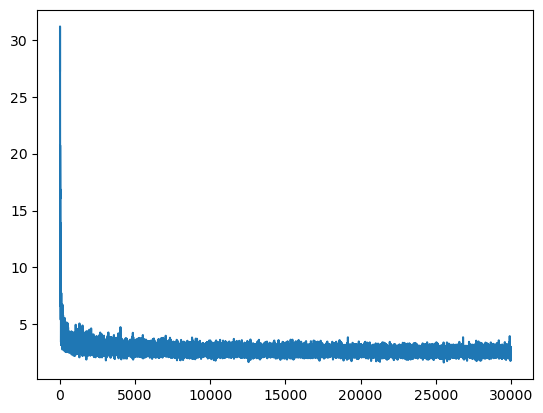

In [153]:
plt.plot(stepi, lossi)

In [169]:
emb = C[Xtr] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32,100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2418, grad_fn=<NllLossBackward0>)

In [170]:
emb = C[Xdev] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32,100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2463, grad_fn=<NllLossBackward0>)

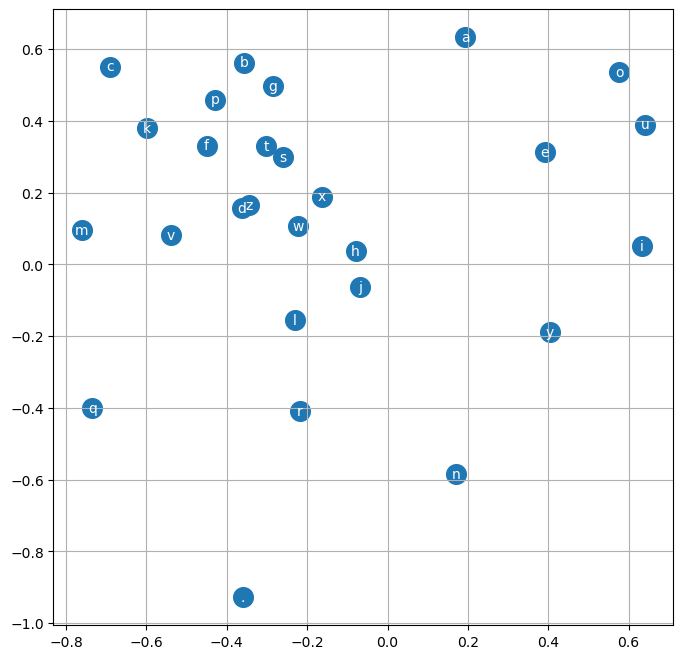

In [172]:
# displayin the string embeddings
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')
plt.show()

##### using large embedings

In [230]:
g = torch.Generator(). manual_seed(123456421) # for reproducibility
C = torch.randn((27,12), generator=g)
W1 = torch.randn((48, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [231]:
sum(p.nelement() for p in parameters) # number of parameters

23151

In [232]:
lri = list()
lossi = list ()
stepi = list ()

In [233]:
for p in parameters:
    p.requires_grad = True

In [240]:
for i in range(400000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass 
    emb = C[Xtr[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 48) @ W1 + b1) # 32,100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    # lr = lrs[i]
    lr = 0.5 if i < 250000 else 0.1 if i < 300000 else 0.01
    for p in parameters:
        p.data += -lr *  p.grad
    
    # track
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

#print(loss.item())

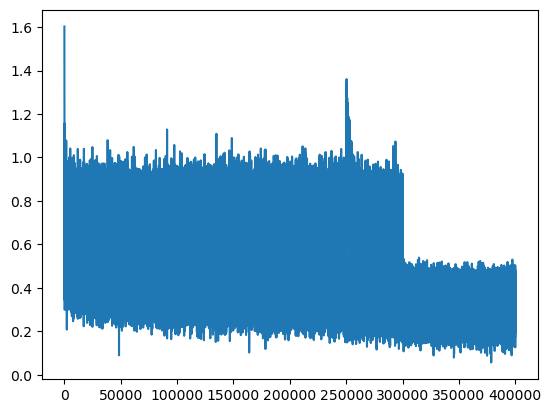

In [243]:
plt.plot(stepi,lossi)
plt.show()

In [241]:
emb = C[Xtr] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 48) @ W1 + b1) # 32,100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0852, grad_fn=<NllLossBackward0>)

In [242]:
emb = C[Xdev] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 48) @ W1 + b1) # 32,100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1564, grad_fn=<NllLossBackward0>)

In [244]:
emb = C[Xtest] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 48) @ W1 + b1) # 32,100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytest)
loss

tensor(2.1610, grad_fn=<NllLossBackward0>)

In [248]:
# sample from model
g = torch.Generator().manual_seed(42083209802 + 102)

for _ in range(10):
    out = list()
    context = [0] * 4
    while True:
        emb = C[torch.tensor([context])]      # (1, 4, 12)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)  # emb.view(1, 48) @ (48, 300) = (1, 300)
        logits = h @ W2 + b2 
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''. join(itos[i] for i in out))

klandoloi.
aidhan.
alanhina.
anyx.
kinsley.
nataheylan.
aarien.
abind.
alex.
imar.
